### Lifetime of a machine.
##### The lifetime of a machine (in days) is a random variable T with mass function f. Given that the machine is working after $t$ days, what is the mean subsequent lifetime of the machine when:
(a) $f(T)=1/(\Sigma+1)$ for $T \in \{0,1,...,\Sigma\}$

(b) $f(T)=2^{-T}$ for $T=1,2,...$

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import random

Sum of the uniform PMF: 1.0
Sum of the two-power PMF: 0.9999999999999991


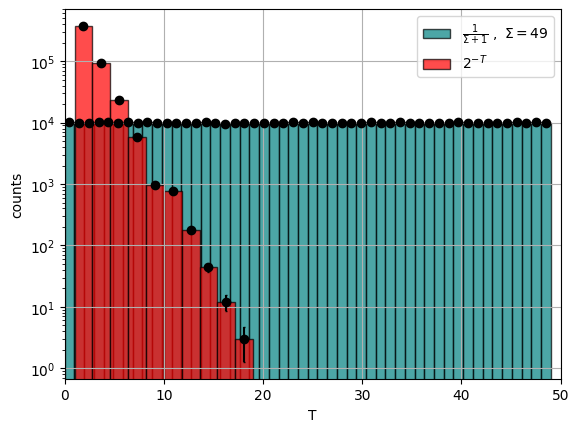

In [281]:
# define functions for (a) and (b)
def one_over_np1(n):
    return 1/(n+1)

def two_power_mt(x):
    return (1/2**x)

# define the range of T
T0 = np.arange(0, 50, 1)
T1 = np.arange(1, 51, 1)
uniform_T = np.full(T0.shape, one_over_np1(max(T0)), dtype=float)
twopower_T = two_power_mt(T1)

# check that the PMF are nromalized to 1
print('Sum of the uniform PMF:', np.sum(uniform_T))
print('Sum of the two-power PMF:', np.sum(twopower_T))

# simulate the random variable with both distributions
N = 500000
uniform_sim_T = random.choices(T0, weights=uniform_T, k = N)
two_power_sim_T = random.choices(T1, weights=twopower_T, k = N)

# plot the simulated data
plt.figure()
counts0, bins0, patches0 = plt.hist(uniform_sim_T, bins=50, alpha=0.7, label=r'$\frac{1}{\Sigma+1}~,~\Sigma=49$',color='teal', edgecolor='black')
bins0_center = (bins0[:-1] + bins0[1:])/2
std0 = np.sqrt(counts0)
plt.errorbar(bins0_center, counts0, yerr=std0, fmt='o', color='black', capsize=1)
counts1, bins1, patches1 = plt.hist(two_power_sim_T, bins=10, alpha=0.7, label=r'$2^{-T}$',color='red', edgecolor='black')
bins1_center = (bins1[:-1] + bins1[1:])/2
std1 = np.sqrt(counts1)
plt.errorbar(bins1_center, counts1, yerr=std1, fmt='o', color='black', capsize=1)
plt.xlabel('T')
plt.ylabel(r'counts')
plt.legend()
plt.yscale('log')
plt.grid('both')
plt.xlim(0, 50)
#plt.ylim(0.001, 1)
plt.show()

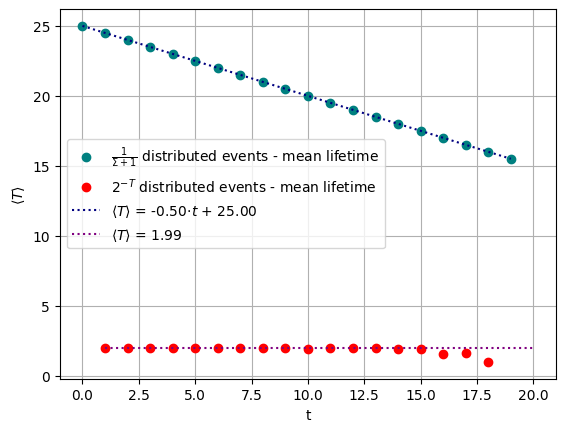

In [283]:
# now compute the mean lifetime after a time t
t0 = np.arange(0, 20, 1)
t1 = np.arange(1, 21, 1)

# compute the mean lifetime for both distribution
mean_lifetime_uniform = []
mean_lifetime_two_power = []
# mean lifetime is the mean of T-t for T>t
for i in range(0, len(t)):
    unitform_gtr_t = np.array([x for x in uniform_sim_T if x > t0[i]])
    mean_lifetime_uniform.append(np.mean(unitform_gtr_t - t0[i]))
    two_power_gtr_t = np.array([x for x in two_power_sim_T if x > t1[i]])
    mean_lifetime_two_power.append(np.mean(two_power_gtr_t - t1[i]))

# fit ax+b to the mean lifetimes
fit_uniform = np.polyfit(t0, mean_lifetime_uniform, 1)
fit_two_power = np.polyfit(t1[:-6], mean_lifetime_two_power[:-6], 0)

# plot the mean lifetimes
plt.figure()
plt.plot(t0, mean_lifetime_uniform, 'o', label=r'$\frac{1}{\Sigma+1}$ distributed events - mean lifetime', color='teal')
plt.plot(t1, mean_lifetime_two_power, 'o', label=r'$2^{-T}$ distributed events - mean lifetime', color='red')
plt.plot(t0, fit_uniform[0]*t0 + fit_uniform[1], color='navy', linestyle=':', label=r'$\langle T \rangle$ = {:.2f}$\cdot t$ + {:.2f}'.format(fit_uniform[0], fit_uniform[1]))
plt.plot(t1, fit_two_power[0]*np.ones(len(t1)), color='purple', linestyle=':', label=r'$\langle T \rangle$ = {:.2f}'.format(fit_two_power[0]))
plt.xlabel('t')
plt.ylabel(r'$\langle T \rangle$')
plt.legend()
plt.grid('both')
plt.show()


##### The mean lifetime for $f(T)= 2^{-T}$ is $\langle T \rangle = 2$.
##### The uniform distribution has mean lifetime $\langle T \rangle=\frac{\Sigma+1}{2}-\frac{1}{2}T$.